# BASIC VISIALIZATIONS OF SCATTERPLOTS

In this notebook, we generate basic (static) visualizations of crime-related data as scatterplots, we generate the following plots:
- A plot of only geographical data.
- A plot for each type of crime.
- A plot with all types of crimes available.

__NOTE__: Given the amount of data, plots take some time to be generated (about a minute), and image files have a considerable size (not included in the repository).

## Notebook setup

In [1]:
import pickle
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIR_DATA_GEO = "../data/malhas"
PATH_DISTRICT = f"{DIR_DATA_GEO}/SIRGAS_GPKG_distrito.gpkg"
PATH_HIDRO = f"{DIR_DATA_GEO}/SIRGAS_SHP_hidromassadagua_polygon.shp"
#PATH_HIDRO = f"{DIR_DATA_GEO}/SAD69-96_SHP_hidromassadagua_polygon.shp"

PATH_SUBWAY_LINE = f"{DIR_DATA_GEO}/SIRGAS_GPKG_linhametro.gpkg"
#PATH_SUBWAY_STATION = f"{DIR_DATA_GEO}/SIRGAS_GPKG_distrito.gpkg"
PATH_TRAIN_LINE = f"{DIR_DATA_GEO}/SIRGAS_GPKG_linhatrem.gpkg"
#PATH_TRAIN_STATION = f"{DIR_DATA_GEO}/SIRGAS_GPKG_distrito.gpkg"

In [3]:
def plot_subway_lines(ax, gdf, alpha, linewidth) -> None:
    dict_colors = {
        "AZUL": "#0053a1",
        "VERDE": "#008062",
        "VERMELHA": "#ef4035",
        "LILAS": "#794d9f",
        "PRATA": "#868f91",
        "AMARELA": "#ffd503",
    }
    for i, row in gdf.iterrows():
        gdf.iloc[[i]].plot(
            ax=ax,
            facecolor="None",
            edgecolor=dict_colors[row["lmt_nome"]],
            alpha=alpha,
            linewidth=linewidth
        )
    return

def plot_train_lines(ax, gdf, alpha, linewidth) -> None:
    dict_colors = {
        "ESMERALDA": "#00a88e",
        "CORAL": "#f04e23",
        "SAFIRA": "#083f89",
        "RUBI": "#9f1766",
        "DIAMANTE": "#9f9f96",
        "TURQUESA": "#007d8f",
        "JADE": "#00ac5c"
    }
    for i, row in gdf.iterrows():
        gdf.iloc[[i]].plot(
            ax=ax,
            facecolor="None",
            edgecolor=dict_colors[row["nm_linha"]],
            alpha=alpha,
            linewidth=linewidth
        )
    return

Load crimes dataframes,

In [4]:
INCIDENT = 'furto_celular'
with open(f"{INCIDENT}.pkl", 'rb') as file:
#with open('furto_celular.pkl', 'rb') as file:
    gdf_loc = pickle.load(file)

In [5]:
gdf_loc

,PERIDOOCORRENCIA,LATITUDE,LONGITUDE,period,year,month,date,crime,geometry
0,A NOITE,-23.561936,-46.655774,2023_01,2023,1,2023-01-01,furto_celular,POINT (-46.65577 -23.56194)
1,A NOITE,-23.566569,-46.649603,2023_01,2023,1,2023-01-01,furto_celular,POINT (-46.6496 -23.56657)
2,A NOITE,-23.557661,-46.660461,2023_01,2023,1,2023-01-01,furto_celular,POINT (-46.66046 -23.55766)
3,A NOITE,-23.557955,-46.660494,2023_01,2023,1,2023-01-01,furto_celular,POINT (-46.66049 -23.55796)
4,A TARDE,-23.521760,-46.701048,2023_01,2023,1,2023-01-01,furto_celular,POINT (-46.70105 -23.52176)
...,...,...,...,...,...,...,...,...,...
17075,A NOITE,-23.599521,-46.498518,2023_12,2023,12,2023-12-01,furto_celular,POINT (-46.49852 -23.59952)
17076,DE MADRUGADA,-23.554564,-46.655483,2023_12,2023,12,2023-12-01,furto_celular,POINT (-46.65548 -23.55456)
17077,DE MADRUGADA,-23.536553,-46.637138,2023_12,2023,12,2023-12-01,furto_celular,POINT (-46.63714 -23.53655)
17078,A NOITE,-23.565739,-46.651238,2023_12,2023,12,2023-12-01,furto_celular,POINT (-46.65124 -23.56574)


Read Districts,

In [6]:
gdf_distr = gpd.read_file(PATH_DISTRICT)

In [7]:
layers = gpd.list_layers(PATH_DISTRICT)
print(layers)

                   name geometry_type
0  SIRGAS_GPKG_distrito       Unknown


In [8]:
gdf_distr.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
#gdf_distr.set_crs(epsg=4674)
gdf_distr = gdf_distr.to_crs(crs="EPSG:4674")

In [10]:
gdf_hidro = gpd.read_file(PATH_HIDRO)
gdf_hidro = gdf_hidro.set_crs("EPSG:31983").to_crs("EPSG:4674")  # use gdf_distr.crs


In [11]:
gdf_subway_line = gpd.read_file(PATH_SUBWAY_LINE)
gdf_subway_line = gdf_subway_line.to_crs("EPSG:4674")

gdf_train_line = gpd.read_file(PATH_TRAIN_LINE)
gdf_train_line = gdf_train_line.to_crs("EPSG:4674")

<>:3: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:3: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
C:\Users\camil.LAPTOP-FHSQ7SV9\AppData\Local\Temp\ipykernel_21260\1035985183.py:3: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  sns.scatterplot(data=gdf_loc, x="LONGITUDE", y="LATITUDE", ax=ax, alpha=0.05, size=1, color="red", marker="$\circ$", ec="face")


<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

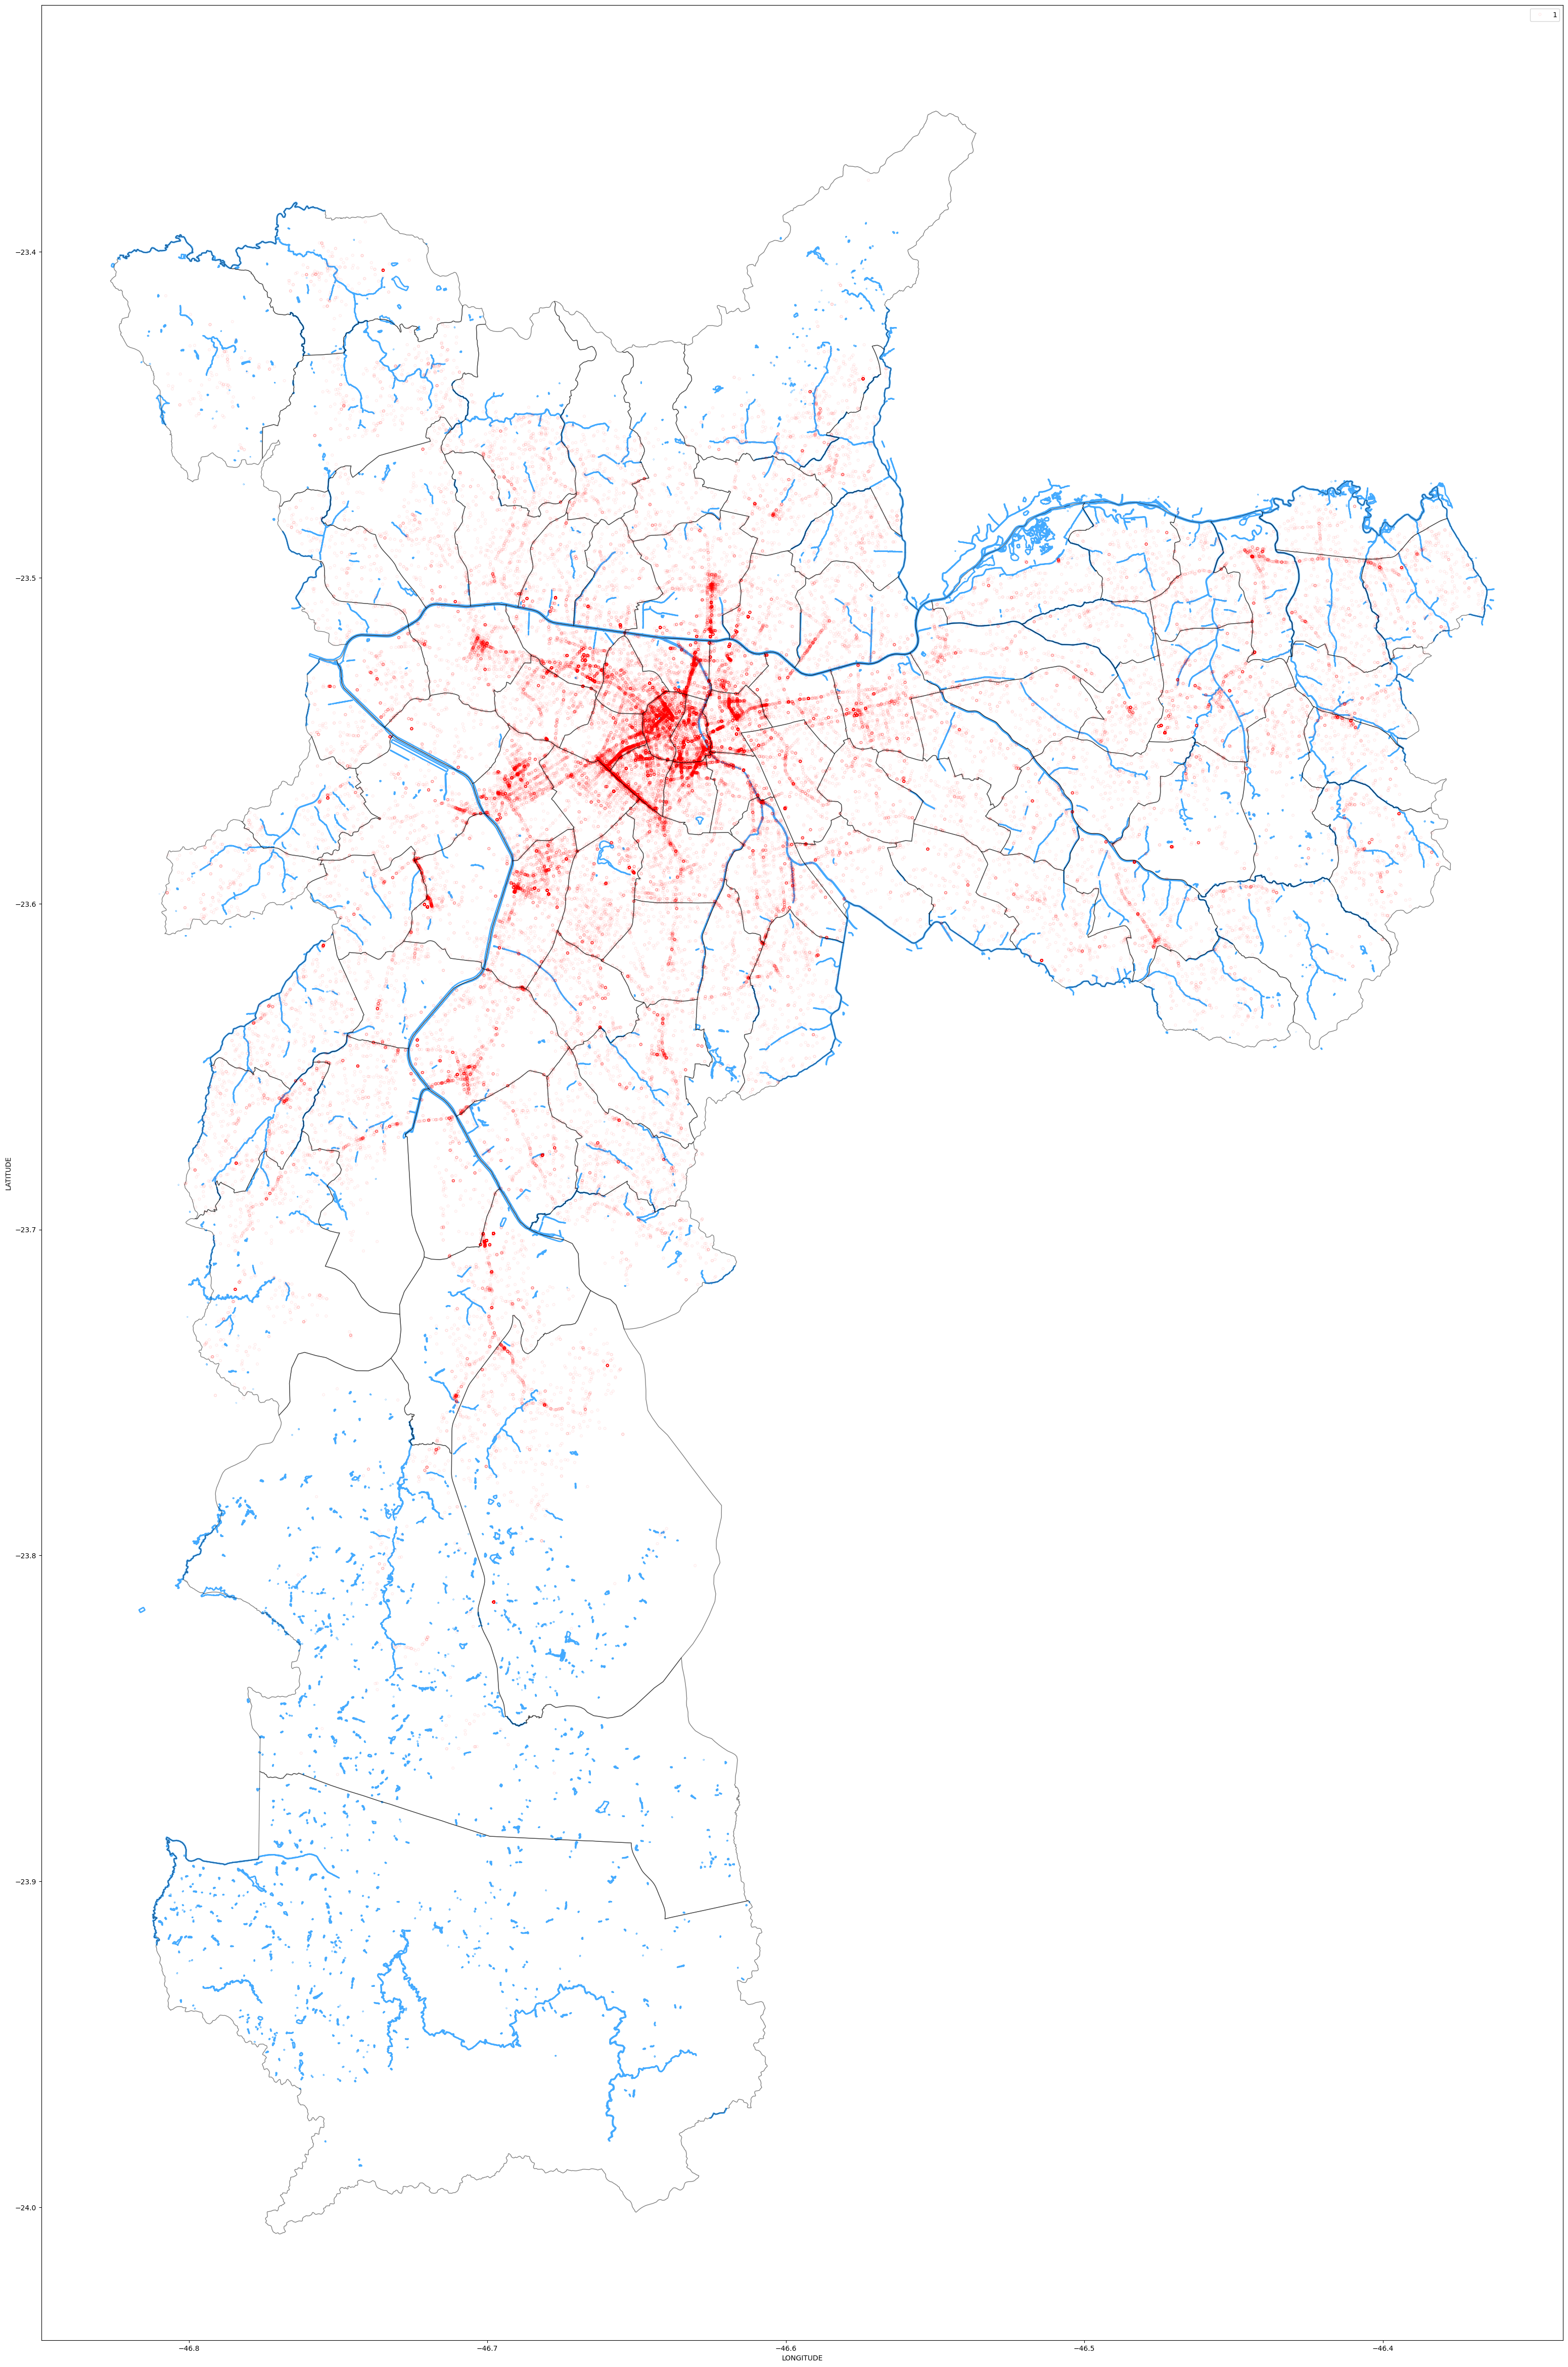

In [12]:
fig, ax = plt.subplots(figsize=(40, 60))
gdf_hidro.plot(ax=ax, facecolor="None", edgecolor="#44aaff", linewidth=2)
sns.scatterplot(data=gdf_loc, x="LONGITUDE", y="LATITUDE", ax=ax, alpha=0.05, size=1, color="red", marker="$\circ$", ec="face")
gdf_distr.plot(ax=ax, facecolor="None", edgecolor="black", alpha=0.5, linewidth=1)
#plot_subway_lines(ax=ax, gdf=gdf_subway_line, alpha=1, linewidth=2)
#plot_train_lines(ax=ax, gdf=gdf_train_line, alpha=1, linewidth=2)

In [13]:
fig.tight_layout()
fig.savefig(f"{INCIDENT}.png", dpi=800)
print(f"{INCIDENT}.png saved")

furto_celular.png saved
